<a href="https://colab.research.google.com/github/mathu3004/Pearl_Path/blob/Preprocessing/ColomboRestaurantsPreprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/Colombo/RestaurantsColombo.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/street1,addressObj/street2,ancestorLocations/0/id,ancestorLocations/0/name,ancestorLocations/0/subcategory,ancestorLocations/1/id,...,reviewTags/27/text,reviewTags/28/reviews,reviewTags/28/text,reviewTags/29/reviews,reviewTags/29/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"57 Ward Place Roof Top, Jetwing Colombo Seven,...",Colombo,Sri Lanka,700.0,57 Ward Place,"Roof Top, Jetwing Colombo Seven",293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.jetwinghotels.com/jetwingcolombose...
1,"2 Galle Road, Colombo 00300 Sri Lanka",Colombo,Sri Lanka,300.0,2 Galle Road,NaN,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.facebook.com/1864restaurant/
2,"106 Thimbirigasyaya Road, Colombo 00500 Sri Lanka",Colombo,Sri Lanka,500.0,106 Thimbirigasyaya Road,NaN,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.facebook.com/bubblemebubbletea
3,"10 Galle Face Drive, Colombo 00300 Sri Lanka",Colombo,Sri Lanka,300.0,10 Galle Face Drive,NaN,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://barracuda.lk
4,"590 Colombo - Galle Main Road Marino Mall, Col...",Colombo,Sri Lanka,NaN,590 Colombo - Galle Main Road,Marino Mall,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons', 'price_',
                                                             'ancestorlocations_','nearestmetrostations_', 'neighborhoodlocations_',
                                                             'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult', 'addressobj_state',
                   'travelerchoiceaward', 'establishmenttypes', 'dishes', 'type', 'website', 'isnearbyresult', 'localaddress', 'localname',
                   'opennowtext', 'photocount', 'pricerange', 'locallangcode', 'id', 'locationstring','menuweburl',
                   'subcategories_0', 'addressobj_country', 'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return "unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'travelerchoiceaward', 'rankingdenominator', 'description',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'reviews_and_text', 'phone', 'email'
]

# Replace missing values: text columns with 'unknown', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Remove duplicate rows based on all columns
df.drop_duplicates()

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/Colombo/PreprocessedRestaurantsColombo.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"57 Ward Place Roof Top, Jetwing Colombo Seven,...",Colombo,restaurant,Named after our sophisticated location on Ward...,resv.colomboseven@jetwinghotels.com,6.91658,79.86995,Ward 7,42,+94 11 2 550200,$$ - $$$,880,148,4.5,3.417001,https://www.tripadvisor.com/Restaurant_Review-...,"Bar, Pub",unknown,"Reservations, Outdoor Seating, Seating, Televi...","Lunch, Dinner, Brunch, Late Night, Drinks"
1,"2 Galle Road, Colombo 00300 Sri Lanka, 300.0",Colombo,restaurant,1864 Limited Edition is a high-class restauran...,info@1864limitededition.com,unknown,unknown,1864 Limited Edition,18,+94742601641,$$$$,880,131,5.0,3.457108,https://www.tripadvisor.com/Restaurant_Review-...,French,unknown,"Reservations, Private Dining, Seating, Parking...","Dinner, Late Night, Drinks"
2,"106 Thimbirigasyaya Road, Colombo 00500 Sri La...",Colombo,restaurant,unknown,bubblemebubbletea@gmail.com,6.89345,79.87038,Bubble Me Bubble Tea,26,+94 11 2 554152,$$ - $$$,880,276,4.0,3.165838,https://www.tripadvisor.com/Restaurant_Review-...,Cafe,unknown,Takeout,unknown
3,"10 Galle Face Drive, Colombo 00300 Sri Lanka, ...",Colombo,restaurant,"Breeze Barracuda , the latest addition to Barr...",info@barracuda.lk,6.921183,79.84617,Breeze Barracuda,104,+94 77 070 7050,$$ - $$$,880,196,4.0,3.286445,https://www.tripadvisor.com/Restaurant_Review-...,"Asian, Contemporary, Sri Lankan",Vegetarian friendly,"Reservations, Outdoor Seating, Seating, Serves...","Lunch, Dinner"
4,"590 Colombo - Galle Main Road Marino Mall, Col...",Colombo,restaurant,unknown,unknown,6.900297,79.85292,Shiwu Chinese Restaurant,41,+94 76 245 5599,$$ - $$$,800,233,4.0,3.273561,https://www.tripadvisor.com/Restaurant_Review-...,"Chinese, Asian","Vegetarian friendly, Vegan options","Reservations, Seating, Serves Alcohol, Table S...","Lunch, Dinner"


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/Colombo/PreprocessedRestaurantsColombo.csv'


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/Ella/RestaurantsElla.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/0/name,...,reviewTags/27/text,reviewTags/28/reviews,reviewTags/28/text,reviewTags/29/reviews,reviewTags/29/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"Wellawaya Road, Ella Ella's Edge Resort, Ella ...",Ella,Sri Lanka,90090.0,NaN,"Wellawaya Road, Ella",Ella's Edge Resort,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.ellasedgeresort.com
1,"No 56 Wellawaya Rd, Ella 90090 Sri Lanka",Ella,Sri Lanka,90090.0,NaN,No 56 Wellawaya Rd,NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.facebook.com/CafeCElla
2,"Ella Rd, Ella 90090 Sri Lanka",Ella,Sri Lanka,90090.0,NaN,Ella Rd,NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.laellabreeze.com
3,"Railway Station Road, Ella 90090 Sri Lanka",Ella,Sri Lanka,90090.0,NaN,Railway Station Road,NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.ellalovers.com
4,"No. 36 Waterfall Road, off Ella/Wellawaya Road...",Ella,Sri Lanka,90090.0,NaN,"No. 36 Waterfall Road, off Ella/Wellawaya Road",NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.ellaspirit.org


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons',
                                                             'price_', 'ancestorlocations_', 'nearestmetrostations_',
                                                             'neighborhoodlocations_', 'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult',
                   'addressobj_state', 'travelerchoiceaward', 'establishmenttypes', 'dishes', 'type', 'website',
                   'isnearbyresult', 'localaddress', 'localname', 'opennowtext', 'photocount', 'pricerange',
                   'locallangcode', 'id', 'locationstring','menuweburl', 'subcategories_0',
                   'addressobj_country', 'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return f"unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'travelerchoiceaward', 'rankingdenominator', 'description',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'reviews_and_text', 'phone', 'email'
]

# Replace missing values: text columns with 'not provided', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/Ella/PreprocessedRestaurantsElla.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"Wellawaya Road, Ella Ella's Edge Resort, Ella ...",Ella,restaurant,unknown,info@ellasedgeresort.com,6.870678,81.04761,Ella's Edge Restaurant,44,+94 77 393 0455,$$ - $$$,177.0,72.0,4.5,3.306603,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Chinese, Indian, Asian, Sri Lankan",Vegetarian friendly,"Outdoor Seating, Seating, Table Service","Breakfast, Lunch, Dinner"
1,"No 56 Wellawaya Rd, Ella 90090 Sri Lanka, 90090.0",Ella,restaurant,Cafe C is one of the most famous restaurants i...,ellacafec@gmail.com,6.874613,81.04735,Cafe C Ella,435,+94 71 814 1746,$,154.0,19.0,5.0,4.67991,https://www.tripadvisor.com/Restaurant_Review-...,"Chinese, Grill, Street Food, Sri Lankan","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Outdoor Seating, Seating, Wheelchair ...","Lunch, Dinner"
2,"Ella Rd, Ella 90090 Sri Lanka, 90090.0",Ella,restaurant,La Vista This large and busy restaurant and ba...,info@oakraylaellabreeze.com,6.873278,81.04905,Oak Ray La Ella Breeze,631,+94 76 442 0331,$,177.0,53.0,4.0,3.697622,https://www.tripadvisor.com/Restaurant_Review-...,"Beijing Specialties, NorthWestern Chinese, Sri...","Vegetarian friendly, Vegan options","Takeout, Reservations, Outdoor Seating, Buffet...","Breakfast, Lunch, Dinner, Late Night"
3,"Railway Station Road, Ella 90090 Sri Lanka, 90...",Ella,restaurant,Element Hiking Bar is an ECO friendly restaura...,ellementhiking.bar@gmail.com,6.874612,81.046936,Hiking Bar & Restaurant,885,+94 77 592 9597,$,177.0,9.0,5.0,4.829502,https://www.tripadvisor.com/Restaurant_Review-...,"Chinese, Bar, Cafe, Asian, Sri Lankan","Vegetarian friendly, Vegan options","Takeout, Outdoor Seating, Seating, Street Park...","Breakfast, Lunch, Dinner, Brunch, Drinks"
4,"No. 36 Waterfall Road, off Ella/Wellawaya Road...",Ella,restaurant,Located outside Ella Town to keep the 'hype' a...,lank.sheldrake@yahoo.com,6.825725,81.07735,BarCeylona Space Cafe,1,+94 71 756 8049,$$ - $$$,177.0,138.0,5.0,3.019732,https://www.tripadvisor.com/Restaurant_Review-...,"French, German, Asian, Sri Lankan",unknown,unknown,unknown


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/Ella/PreprocessedRestaurantsElla.csv'


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/Kandy/KandyRestaurants.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/0/name,...,reviewTags/25/text,reviewTags/26/reviews,reviewTags/26/text,reviewTags/27/reviews,reviewTags/27/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",Kandy,Sri Lanka,20000.0,NaN,12 Mahamaya Mawatha,NaN,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.grandserendibhotel.com/index.php
1,"839 Peradeniya Road Kandyan Arts Residency, Ka...",Kandy,Sri Lanka,20000.0,NaN,839 Peradeniya Road,Kandyan Arts Residency,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://hotelkandyanarts.com/
2,"9 Sangaraja Mawatha, Kandy 8 Sri Lanka",Kandy,Sri Lanka,8.0,NaN,9 Sangaraja Mawatha,NaN,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN
3,"155 S W R D Bandaranayake Road, Kandy 20000 Sr...",Kandy,Sri Lanka,20000.0,NaN,155 S W R D Bandaranayake Road,NaN,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.kandycitystay.com
4,"No. 1C Devi Road Galkaduwa Junction, Kandy 200...",Kandy,Sri Lanka,20000.0,NaN,No. 1C Devi Road,Galkaduwa Junction,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.facebook.com/profile.php?id=615576...


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons',
                                                             'price_', 'ancestorlocations_', 'nearestmetrostations_',
                                                             'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult',
                   'addressobj_state', 'travelerchoiceaward', 'establishmenttypes', 'dishes',  'type', 'website',
                   'isnearbyresult', 'localaddress', 'localname', 'opennowtext', 'photocount', 'pricerange',
                   'locallangcode', 'id', 'locationstring','menuweburl', 'subcategories_0',
                   'addressobj_country', 'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return "unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'rankingdenominator',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'phone', 'email', 'description'
]

# Replace missing values: text columns with 'unknown', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/Kandy/PreprocessedRestaurantsKandy.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka, 20...",Kandy,restaurant,Grand Sky Lounge is Located on the rooftop of ...,info@grandserendibhotel.com,7.285323,80.644485,Grand Sky Lounge,64,+94 81 2 244333,$$$$,321,3,5.0,4.683845,https://www.tripadvisor.com/Restaurant_Review-...,"Bar, International, Pub, Dining bars",unknown,"Reservations, Outdoor Seating, Seating, Parkin...","Breakfast, Lunch, Dinner, Brunch, Drinks"
1,"839 Peradeniya Road Kandyan Arts Residency, Ka...",Kandy,restaurant,"Enjoy casual, contemporary cuisine all day din...",info@hotelkandyanarts.com,7.276945,80.615524,Kandyan Arts Restaurant,238,+94 81 2 229825,$$ - $$$,321,48,3.5,3.443559,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, International, Asian, Indonesian, Mon...","Vegetarian friendly, Vegan options","Reservations, Outdoor Seating, Buffet, Seating...","Lunch, Dinner, Drinks"
2,"9 Sangaraja Mawatha, Kandy 8 Sri Lanka, 8.0",Kandy,restaurant,unknown,tkgcbistro@gmail.com,7.286927,80.64747,The Kandy Garden Cafe,683,+94 81 2 220355,$,321,17,4.0,4.077689,https://www.tripadvisor.com/Restaurant_Review-...,"Asian, Sri Lankan","Vegetarian friendly, Vegan options","Takeout, Seating, Table Service","Breakfast, Lunch, Dinner, Late Night"
3,"155 S W R D Bandaranayake Road, Kandy 20000 Sr...",Kandy,restaurant,This restaurant is for the people who love to ...,info@kandycitystay.com,7.286809,80.627655,The Whizz,102,+94 81 2 228080,$$ - $$$,321,41,4.5,3.499032,https://www.tripadvisor.com/Restaurant_Review-...,Cafe,"Vegetarian friendly, Vegan options","Reservations, Outdoor Seating, Seating, Parkin...","Breakfast, Lunch, Dinner, Late Night, Drinks"
4,"No. 1C Devi Road Galkaduwa Junction, Kandy 200...",Kandy,restaurant,The Chef Corner Restaurant & BYOB located at a...,chefcorner.viplounge@gmail.com,7.2955,80.6356,The Chef Corner & Vip Lounge By Sugath,6,+94 81 2 226750,$$ - $$$,321,89,5.0,3.194740,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Chinese, Asian, Sri Lankan",unknown,"Delivery, Takeout, Seating, Parking Available,...","Breakfast, Lunch, Dinner, Brunch, Drinks"


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/Kandy/PreprocessedRestaurantsKandy.csv'


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/NuwaraEliya/RestaurantsNuwaraEliya.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/0/name,...,reviewTags/19/text,reviewTags/20/reviews,reviewTags/20/text,reviewTags/21/reviews,reviewTags/21/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"18 Badulla Road, Nuwara Eliya 22200 Sri Lanka",Nuwara Eliya,Sri Lanka,22200.0,NaN,18 Badulla Road,NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN
1,"158, Kandy Road, Nuwara Eliya 22220 Sri Lanka",Nuwara Eliya,Sri Lanka,22220.0,NaN,"158, Kandy Road",NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.pizzahut.lk
2,"20 Kandy Road, Nuwara Eliya 22200 Sri Lanka",Nuwara Eliya,Sri Lanka,22200.0,NaN,20 Kandy Road,NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.facebook.com/The-Pub-407674586680194/
3,"405 Kandy Road Bambarakale, Nuwaraeliya, Nuwar...",Nuwara Eliya,Sri Lanka,22200.0,NaN,"405 Kandy Road Bambarakale, Nuwaraeliya",NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.midkyhotels.com
4,"Nuwaraeliya Road, Talawakele 22100 Sri Lanka",Talawakele,Sri Lanka,22100.0,NaN,Nuwaraeliya Road,NaN,NaN,12158457,Talawakele,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons', 'price_',
                                                             'ancestorlocations_', 'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult',
                   'addressobj_state', 'travelerchoiceaward', 'establishmenttypes', 'dishes',  'type', 'website',
                   'isnearbyresult', 'localaddress', 'localname', 'opennowtext', 'photocount', 'pricerange',
                   'id', 'locationstring','menuweburl', 'subcategories_0', 'addressobj_country',
                   'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return "unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'travelerchoiceaward', 'rankingdenominator', 'description',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'phone', 'email'
]

# Replace missing values: text columns with 'not provided', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/NuwaraEliya/PreprocessedRestaurantsNuwaraEliya.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"18 Badulla Road, Nuwara Eliya 22200 Sri Lanka,...",Nuwara Eliya,restaurant,unknown,unknown,6.956621,80.77682,Indian Summer Restaurant,4,+94 52 2 224511,$$ - $$$,87.0,59.0,4.0,3.067908,https://www.tripadvisor.com/Restaurant_Review-...,unknown,unknown,unknown,"Lunch, Dinner"
1,"158, Kandy Road, Nuwara Eliya 22220 Sri Lanka,...",Nuwara Eliya,restaurant,unknown,unknown,6.97488,80.76336,Pizza Hut,28,+94 11 7 729729,$$ - $$$,101.0,72.0,3.0,3.021859,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Pizza, Fast Food",Vegetarian friendly,"Delivery, Takeout",unknown
2,"20 Kandy Road, Nuwara Eliya 22200 Sri Lanka, 2...",Nuwara Eliya,restaurant,unknown,unknown,6.974394,80.76689,The Pub,159,+94 52 2 235788,$$ - $$$,87.0,56.0,3.0,3.074628,https://www.tripadvisor.com/Restaurant_Review-...,"Bar, Pub",unknown,"Takeout, Seating, Television, Serves Alcohol, ...","Lunch, Dinner"
3,"405 Kandy Road Bambarakale, Nuwaraeliya, Nuwar...",Nuwara Eliya,restaurant,Located on the second floor. Enjoy the beautif...,info@midkyhotels.com,6.97809,80.75889,Midky Restaurant,0,+94 77 730 9601,$,unknown,unknown,unknown,unknown,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Chinese, Indian, Asian, Sri Lankan, A...",unknown,"Takeout, Reservations, Outdoor Seating, Seatin...","Breakfast, Lunch, Dinner"
4,"Nuwaraeliya Road, Talawakele 22100 Sri Lanka, ...",Talawakele,restaurant,unknown,unknown,6.933452,80.66997,Kochchi Family Restaurant,0,+94 77 718 7511,unknown,unknown,unknown,unknown,unknown,https://www.tripadvisor.com/Restaurant_Review-...,"Asian, Sri Lankan",unknown,unknown,unknown


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/NuwaraEliya/PreprocessedRestaurantsNuwaraEliya.csv'


In [33]:
import pandas as pd
import os
import glob

# List of folder paths where the CSVs are stored
folders = [
    "/content/drive/My Drive/NuwaraEliya",
    "/content/drive/My Drive/Ella",
    "/content/drive/My Drive/Kandy",
    "/content/drive/My Drive/Colombo"
]

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each folder and read only CSV files that contain "Preprocessed" in their filename
for folder in folders:
    csv_files = glob.glob(os.path.join(folder, "PreprocessedRestaurants*.csv"))  # Filter files with "Preprocessed" in name

    for file in csv_files:
        df = pd.read_csv(file)  # Read CSV
        dataframes.append(df)   # Append DataFrame to the list

# Concatenate all DataFrames into a single one
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame as a CSV
merged_df.to_csv("/content/drive/My Drive/Colombo/PreprocessedMergedRestaurants.csv", index=False)

print("Merged CSV saved as merged_output.csv")

Merged CSV saved as merged_output.csv


In [45]:
import pandas as pd

# Load the merged CSV file
file_path = '/content/drive/My Drive/Colombo/PreprocessedMergedRestaurants.csv'
df = pd.read_csv(file_path)

# Count the number of unknown values in each column
unknown_counts = df.apply(lambda col: (col.astype(str).str.lower() == 'unknown').sum())

print(unknown_counts)

address                  0
addressobj_city          0
category                 0
description            320
email                  271
latitude                22
longitude               22
name                     0
numberofreviews          0
phone                   34
pricelevel             126
rankingdenominator      31
rankingposition         31
rating                  31
rawranking              31
weburl                   0
cuisines                41
dietaryrestrictions    353
features               135
mealtypes              100
dtype: int64


In [46]:
# Replace "unknown" values with median for specific columns
median_columns = ["rating", "rawranking"]
for col in median_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        median_value = df[col].median(skipna=True)  # Compute median ignoring NaNs
        df[col] = df[col].fillna(median_value)  # Assign filled column back to df

# Replace "unknown" values in "pricerange" with "$$"
# NOTE: Changed 'pricelevel' to 'pricerange' as 'pricelevel' was dropped earlier
if "pricelevel" in df.columns:
    df["pricelevel"] = df["pricelevel"].apply(lambda x: "$$" if str(x).lower() == 'unknown' else x)

# Convert "rankingdenominator" and "rankingposition" to numeric and replace unknowns with mode
mode_columns = ["rankingposition", "rankingdenominator"]
for col in mode_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        mode_value = df[col].mode(dropna=True)  # Get mode
        if not mode_value.empty:  # Ensure mode exists
            df[col] = df[col].fillna(mode_value[0])  # Fill NaNs with mode

# Replace "unknown" values with "unspecified" for specific columns
unspecified_columns = ["dietaryrestrictions", "features", "mealtypes", "phone", "email", "description", "latitude", "longitude"]
for col in unspecified_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: "unspecified" if str(x).lower() == 'unknown' else x)

# Drop rows where "cuisines" column is unknown
if "cuisines" in df.columns:
    df = df[df["cuisines"].str.lower() != "unknown"]

# Define a function to convert price level to LKR
def convert_price_to_lkr(price):
    if price == "$":
        return 300
    elif price == "$$":
        return 600
    elif price == "$$$":
        return 900
    elif price == "$$$$":
        return 1200
    elif price == "$$ - $$$":
        return (600 + 900) // 2  # Average of $$ and $$$
    elif price == "$$$ - $$$$":
        return (900 + 1200) // 2  # Average of $$$ and $$$$
    else:
        return None  # Keep as NaN if price level is unspecified


# Ensure df is a copy before modifying it
df = df.copy()

# Convert 'pricelevel' to LKR and create a new column 'pricelevel_lkr'
if "pricelevel" in df.columns:
    df["pricelevel_lkr"] = df["pricelevel"].apply(convert_price_to_lkr)

# Drop 'pricelevel' column properly
if "pricelevel" in df.columns:
    df = df.drop(columns=["pricelevel"])

# Replace categorical "unspecified" values with NaN
df.replace("unspecified", pd.NA, inplace=True)

# Fill NaN values with meaningful defaults
df.loc[:, "dietaryrestrictions"] = df["dietaryrestrictions"].fillna("No Special Dietary")
df.loc[:, "features"] = df["features"].fillna("Basic")
df.loc[:, "mealtypes"] = df["mealtypes"].fillna("General")
df.loc[:, "email"] = df["email"].fillna("no email")
df.loc[:, "phone"] = df["phone"].fillna("no phone")
df.loc[:, "description"] = df["description"].fillna("No description provided")
df.loc[:, "latitude"] = df["latitude"].fillna("no latitude")
df.loc[:, "longitude"] = df["longitude"].fillna("no longitude")

# Save the final cleaned data
final_cleaned_file_path = "/content/drive/My Drive/Colombo/FinalPreprocessedMergedRestaurants.csv"
df.to_csv(final_cleaned_file_path, index=False)

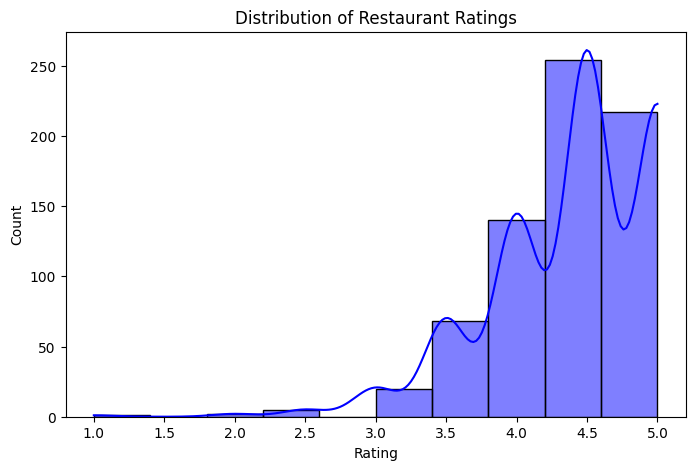

,Unique Count
category,1
cuisines,400
dietaryrestrictions,14
features,464
mealtypes,37


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged CSV file
file_path = '/content/drive/My Drive/Colombo/FinalPreprocessedMergedRestaurants.csv'
df = pd.read_csv(file_path)

# Count unique values in categorical columns
categorical_columns = ["category", "cuisines", "dietaryrestrictions", "features", "mealtypes"]
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Visualizing distribution of restaurant ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Display unique counts of categorical columns
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient="index", columns=["Unique Count"])
display(unique_counts_df)

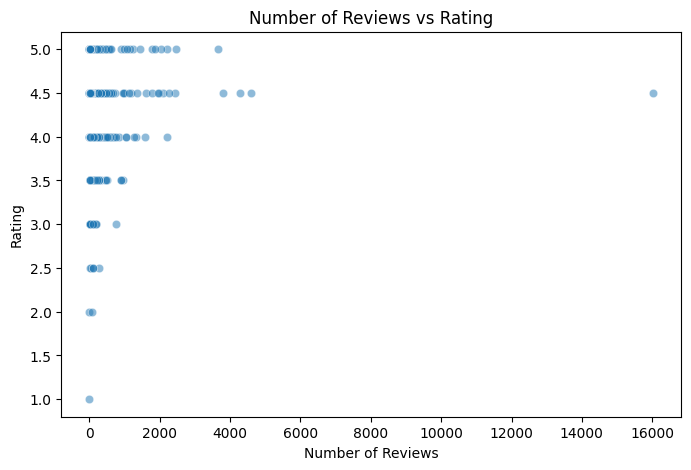

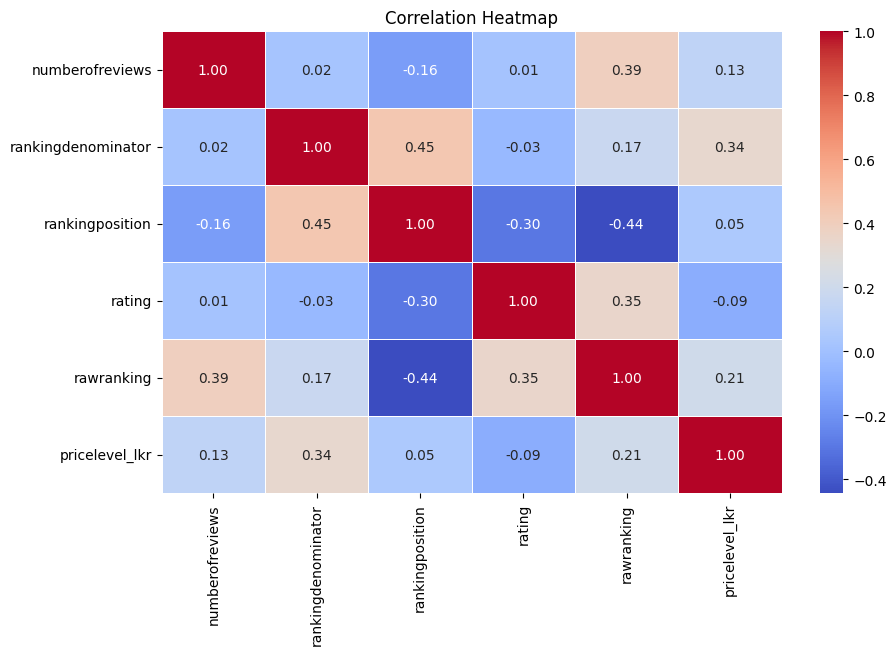

In [ ]:
# Relationship between number of reviews and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["numberofreviews"], y=df["rating"], alpha=0.5)
plt.title("Number of Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

# Correlation heatmap of numerical variables
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()